In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

In [45]:
df = pd.read_csv('heart.csv')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["chol"] < upper_limit]

In [48]:
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["trestbps"] < upper_limit]

In [49]:
q1 = df.thalach.quantile(0.25)
q3 = df.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
df=df[df["thalach"] > lower_limit]

In [50]:
oldpeak_q1 = df.oldpeak.quantile(0.25)
oldpeak_q3 = df.oldpeak.quantile(0.75)
oldpeak_IQR = oldpeak_q3 - oldpeak_q1
oldpeak_lower_limit = oldpeak_q1 - 1.5 * oldpeak_IQR
oldpeak_upper_limit = oldpeak_q3 + 1.5 * oldpeak_IQR
df=df[df["oldpeak"] < oldpeak_upper_limit]

<AxesSubplot:>

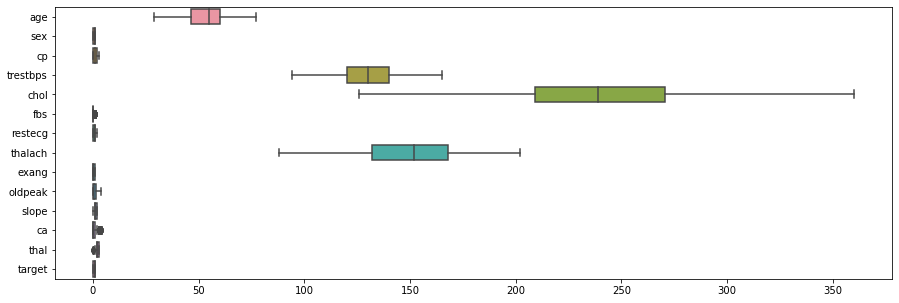

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

In [52]:
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [53]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
Forest_Model = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 1, random_state = 1)
Forest_Model.fit(x_train, y_train)
y_hat_forest = Forest_Model.predict(x_test)
y_hat_forest

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [55]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

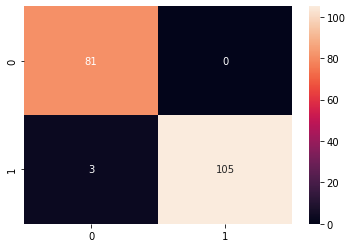

In [57]:
sns.heatmap(confusion_matrix(y_test, y_hat_forest), annot=True, fmt='g')

In [58]:
#Precision
RFPrecision = 81 / (0 + 81)
print(RFPrecision)

1.0


In [59]:
RFRecall = 81 / (3+81)
print(RFRecall)

0.9642857142857143


In [60]:
RFAccuracy = (81+105) / (81+105+3+0)
print(RFAccuracy)

0.9841269841269841


In [61]:
RFF1 = (2 * RFPrecision * RFRecall) / (RFPrecision + RFRecall)
print(RFF1)

0.9818181818181818


In [62]:
total_squared_error_RF = (np.sum((y_test - y_hat_forest)**2))
mean_squared_error_RF = total_squared_error_RF/len(y_test)
print(mean_squared_error_RF)



0.015873015873015872


In [66]:
recall_score(y_test, y_hat_forest)

0.9722222222222222

**Finding best parameters**


In [83]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')




In [84]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV as gs

In [131]:
# parameters = {n_estimators:(100),  'kernel': ('linear', 'rbf'), bootstrap=False} 'C':[1,10]
# metrics = ['recall']
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':(50, 100), 'bootstrap':(True, False), 'min_samples_leaf':(5, 10), 'oob_score':(True, False), 'warm_start':(True, False)}

# #parameters = np.array(parameters)
# #parameters

# Need couple options for params, put in listor tuple

In [125]:
Forest_Model = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 1, random_state = 1)
Empty_Model = RandomForestClassifier()

In [132]:
svc = svm.SVC()
clf = gs(Empty_Model, parameters, scoring = 'recall')
clf.fit(x_train, y_train)

# instance of rf class, create new var instance of empty w/ no arguments



GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': (True, False),
                         'min_samples_leaf': (5, 10), 'n_estimators': (50, 100),
                         'oob_score': (True, False),
                         'warm_start': (True, False)},
             scoring='recall')

In [135]:
clf.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=5, n_estimators=50,
                       warm_start=True)

In [134]:
clf.best_params_
# Best params so far: {'bootstrap': False, 'min_samples_leaf': 5, 'n_estimators': 50, 'oob_score': False,'warm_start': True}

{'bootstrap': False,
 'min_samples_leaf': 5,
 'n_estimators': 50,
 'oob_score': False,
 'warm_start': True}

In [159]:
clf.best_score_

0.9722468354430379

In [145]:
#Best Model
parameters = {'n_estimators':(50), 'bootstrap':(False), 'min_samples_leaf':(5),'oob_score':(False), 'warm_start':(True)}



In [128]:
clf.cv_results_

{'mean_fit_time': array([0.07077131, 0.14508128, 0.07980304, 0.16433234, 0.05768757,
        0.14603286, 0.05572567, 0.11302543]),
 'std_fit_time': array([0.00232693, 0.00604151, 0.02079759, 0.05386259, 0.00060212,
        0.0632264 , 0.00027913, 0.00311671]),
 'mean_score_time': array([0.00660572, 0.01253862, 0.00864978, 0.01160417, 0.00682545,
        0.01193686, 0.00662618, 0.01141362]),
 'std_score_time': array([0.00029057, 0.00076067, 0.00428373, 0.00038847, 0.00030517,
        0.0003662 , 0.00023392, 0.00028651]),
 'param_bootstrap': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[5, 5, 10, 10, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100

# **The best model turns out to be a RandomForestClassifier instance with n\_estimators = \(50\), bootstrap = \(False\), min\_samples\_leaf = \(5\), oob\_score = \(False\), warm\_start = \(True\).**



In [151]:
Best_Model = RandomForestClassifier(n_estimators = (50), bootstrap = (False), min_samples_leaf = (5), oob_score = (False), warm_start = (True))

In [152]:
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [157]:
x_best_train = scaler.fit_transform(x_train)
x_best_test = scaler.transform(x_test)
Best_Model.fit(x_best_train, y_train)
y_hat_forest = Best_Model.predict(x_best_test)


# Recall score: recall\_score\(y\_test, y\_hat\_forest\)



In [158]:
recall_score(y_test, y_hat_forest)

0.9259259259259259

<AxesSubplot:>

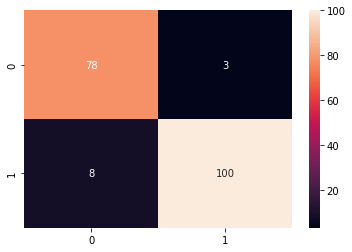

In [160]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_hat_forest), annot=True, fmt='g')